In [25]:
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [26]:
# loading 1 of the netcdf files (1 netcdf file = 1 day of data)
# this file represents the 1st of August 2020
# data from NASA's GLDAS 2.2 numerical model
nc = NetCDFFile('1.nc4')

In [27]:
# assigned the variables 
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
time = nc.variables['time'][:]
SM = nc.variables['SoilMoist_S_tavg'][:]
Temp = nc.variables['AvgSurfT_tavg'][:]
ET = nc.variables['Evap_tavg'][:]


In [28]:
# creating the basemap where we will create the different maps for the different variables
map = Basemap(projection='merc',llcrnrlon=-121.125,llcrnrlat=36.125,urcrnrlon=-119.375,urcrnrlat=37.125,resolution='h') # projection, lat/lon extents and resolution of polygons to draw

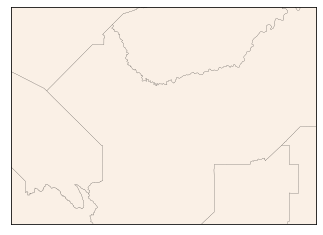

In [29]:
map.drawstates()
map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
map.drawcounties() # you can even add counties (and other shapefiles!)

In [30]:
lons,lats= np.meshgrid(lon,lat) # for this dataset, longitude is 0 through 360, so you need to subtract 180 to properly display on map
x,y = map(lons,lats) # x and y values coresspond to the longitude and latitue values

<ipython-input-38-c41bf0e632c6>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  soilM = map.pcolormesh(x,y,Temp[0,:,:],cmap='jet')


{-121.0: ([<matplotlib.lines.Line2D at 0x121861de820>],
  [Text(14010.554159869827, -1945.9102999819206, '121°W')]),
 -120.75: ([<matplotlib.lines.Line2D at 0x121861debb0>],
  [Text(41837.07144961129, -1945.9102999819206, '120.75°W')]),
 -120.5: ([<matplotlib.lines.Line2D at 0x121861def10>],
  [Text(69663.58873935275, -1945.9102999819206, '120.5°W')]),
 -120.25: ([<matplotlib.lines.Line2D at 0x121861da2b0>],
  [Text(97490.10602909423, -1945.9102999819206, '120.25°W')]),
 -120.0: ([<matplotlib.lines.Line2D at 0x121861da610>],
  [Text(125122.0322888375, -1945.9102999819206, '120°W')]),
 -119.75: ([<matplotlib.lines.Line2D at 0x121861da970>],
  [Text(152948.54957857897, -1945.9102999819206, '119.75°W')]),
 -119.5: ([<matplotlib.lines.Line2D at 0x121861dacd0>],
  [Text(180775.06686832043, -1945.9102999819206, '119.5°W')])}

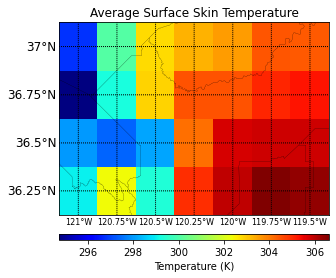

In [38]:
# create plot of average surface skin temperature for 1 day in the region
# this plot uses a color mesh using the pcolormesh function similar to the plot using xarray.plot() below
Temperature = map.pcolormesh(x,y,Temp[0,:,:],cmap='jet')
cb = map.colorbar(Temperature,"bottom", size="3%", pad="10%")
plt.title('Average Surface Skin Temperature')
cb.set_label('Temperature (K)')
map.drawcounties() # you can even add counties (and other shapefiles!)
parallels = np.arange(35,40,0.25) # make latitude lines every 0.25 degrees from 35N 400N
meridians = np.arange(-125,-118,0.25) # make longitude lines every 0.25 degrees from 125E to 118E
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=12) # draw the latitude lines
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=8) # draw the longitude lines

{-121.0: ([<matplotlib.lines.Line2D at 0x1219fe929d0>],
  [Text(14010.554159869827, -1945.9102999819206, '121°W')]),
 -120.5: ([<matplotlib.lines.Line2D at 0x1219fe92d60>],
  [Text(69663.58873935275, -1945.9102999819206, '120.5°W')]),
 -120.0: ([<matplotlib.lines.Line2D at 0x1219fe9b130>],
  [Text(125122.0322888375, -1945.9102999819206, '120°W')]),
 -119.5: ([<matplotlib.lines.Line2D at 0x1219fe9b490>],
  [Text(180775.06686832043, -1945.9102999819206, '119.5°W')])}

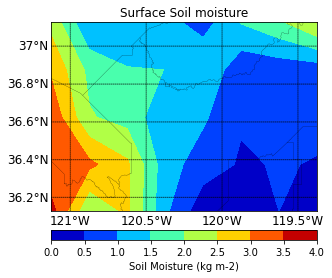

In [32]:
# creates a plot of soil moisture for 1 day in the region
# this plot uses contourf which fills the map with the specified values in the colorbar (not using colormesh)
x,y = map(lons,lats)
soilM = map.contourf(x,y,SM[0,:,:,],cmap='jet')
cb = map.colorbar(soilM,"bottom", size="5%", pad="10%")
plt.title('Surface Soil moisture')
cb.set_label('Soil Moisture (kg m-2)')
map.drawcounties() # you can even add counties (and other shapefiles!)
parallels = np.arange(35,40,0.2) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(-125,-118,0.5) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=12)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12)

{-121.0: ([<matplotlib.lines.Line2D at 0x121af207550>],
  [Text(14010.554159869827, -1945.9102999819206, '121°W')]),
 -120.5: ([<matplotlib.lines.Line2D at 0x121af2078e0>],
  [Text(69663.58873935275, -1945.9102999819206, '120.5°W')]),
 -120.0: ([<matplotlib.lines.Line2D at 0x121af207c40>],
  [Text(125122.0322888375, -1945.9102999819206, '120°W')]),
 -119.5: ([<matplotlib.lines.Line2D at 0x121af207fa0>],
  [Text(180775.06686832043, -1945.9102999819206, '119.5°W')])}

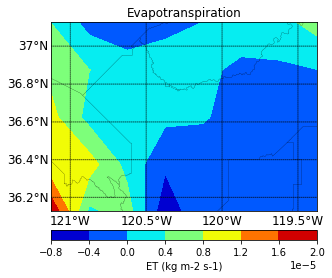

In [33]:
# Map of evapotranspiration data values for the 1st of August 2020
x,y = map(lons,lats)
ET1 = map.contourf(x,y,ET[0,:,:],cmap='jet')
cb = map.colorbar(ET1,"bottom", size="5%", pad="10%")
plt.title('Evapotranspiration')
cb.set_label('ET (kg m-2 s-1)')
map.drawcounties() # you can even add counties (and other shapefiles!)
parallels = np.arange(35,40,0.2) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(-125,-118,0.5) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=12)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=12)

In [34]:
import xarray as xr

In [35]:
# using xarray plotting instead of basemap which is used above
file_2 = xr.open_dataset('1.nc4')
Temp2 = file_2['AvgSurfT_tavg']
ET2 = file_2['Evap_tavg']
SM2 = file_2['SoilMoist_S_tavg']

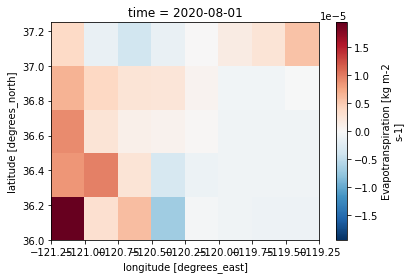

In [36]:
# evapotranspiration color mesh map instead of contour fill map
ET2.plot()

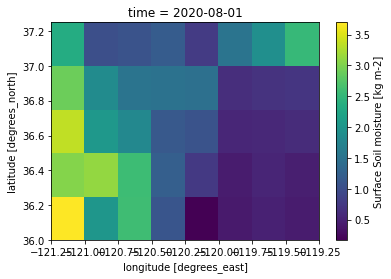

In [37]:
# soil moisture color mesh map
SM2.plot()